In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("hls", 10)

%load_ext autoreload
%autoreload 2

import pickle

from braindecode.experiments.load import load_exp_and_model
from braindecode.analysis.plot_util import plot_head_signals_tight,plot_head_signals

Using gpu device 0: GeForce GTX 780 (CNMeM is disabled, cuDNN 5005)
/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%cd '/home/hartmank/braindecode/convvisual'
import analysis
import utils

/home/hartmank/braindecode/convvisual


In [3]:
%cd '/home/hartmank/braindecode'
exp, model = load_exp_and_model('data/models/paper/ours/cnt/deep4/243', set_invalid_to_NaN=False)

sensor_names = exp.dataset.test_set.sensor_names
sensor_names.remove('Cz')

sampling_rate = exp.dataset.train_set.signal_processor.cnt_preprocessors[1][1]['newfs']
step = 1./sampling_rate
%cd '/home/hartmank/braindecode/convvisual'

/home/hartmank/braindecode


INFO:braindecode.experiments.experiment:Setting n_sample preds automatically to 479
INFO:braindecode.experiments.experiment:Input window length is 522
INFO:braindecode.experiments.experiment:Setting n_sample preds automatically to 479
INFO:braindecode.experiments.experiment:Input window length is 522


/home/hartmank/braindecode/convvisual


### Load RF data of 5 best filters and their best inputs for certain class and layer

In [4]:
data28C0 = utils.load_data('/home/hartmank/data/convvisual/RF_data/models/paper/ours/cnt/deep4/243/50BestInputsFor5BestFilters/Class0_Layer28.data')

In [5]:
X_RF_cropped,Input_baseline = utils.get_cropped_RF_and_baseline(data28C0,data28C0,([0],[1],44,-1))

(4, 50, 44, 522)


In [6]:
print X_RF_cropped.shape,Input_baseline.shape
if len(Input_baseline)>1000:
    Input_baseline = Input_baseline[:1000]

(4, 50, 44, 522) (191, 44, 522)


### Extract features from signals

In [7]:
feature_funcs = (analysis.get_frequency,analysis.get_frequency_change,analysis.get_offset,analysis.get_offset_change)
FFT_base,FFTc_base,mean_base,meanc_base = utils.get_feature_vals(Input_baseline,feature_funcs,sampling_rate=250)

In [8]:
FFT_base = np.asarray(FFT_base.T[0].tolist())
FFTc_base = np.asarray(FFTc_base.T[0].tolist())

In [9]:
print FFT_base.shape

(191, 44, 261)


In [10]:
filt = 0
FFT,FFTc,mean,meanc = utils.get_feature_vals(X_RF_cropped[filt],feature_funcs,sampling_rate=250)
freqs_FFT = FFT.T[2][0]
freqs_FFTc = FFTc.T[2][0]

In [11]:
FFT = np.asarray(FFT.T[0].tolist())
FFTc = np.asarray(FFTc.T[0].tolist())
FFT.shape

(50, 44, 261)

In [12]:
print FFT.shape,mean.shape

(50, 44, 261) (50, 44)


### Compute median and median deviations for features
Frequency spectrum

Difference of frequency spectrum in first and second half of signal

Mean amplitude

Difference of mean amplitude in first and second half

In [13]:
(feat_means,feat_stds),b,names = analysis.feature_distributions_median([FFT,FFTc,mean,meanc],['FFT','FFTc','Mean','Meanc'])
feat_stds = np.asarray(feat_stds)
feat_means = np.asarray(feat_means)

(feat_means_base,feat_stds_base),b,names = analysis.feature_distributions_median([FFT_base,FFTc_base,mean_base,meanc_base],['FFT','FFTc','Mean','Meanc'])
feat_stds_base = np.asarray(feat_stds_base)
feat_means_base = np.asarray(feat_means_base)

names = np.asarray(names)

Make sure this is tested!!
a (50, 44, 261)
a (50, 44, 130)
a (50, 44)
a (50, 44)
Make sure this is tested!!
a (191, 44, 261)
a (191, 44, 130)
a (191, 44)
a (191, 44)


In [14]:
print feat_means.shape,feat_means_base.shape

(17292,) (17292,)


### Compare feature distributions and order them

In [15]:
feat_std_diff = np.divide(feat_stds_base,feat_stds)
sort_std_diff = feat_std_diff.argsort()[::-1]

# This mean difference seems to deliver the most expressive results
feat_mean_diff = np.abs(np.divide(feat_means_base-feat_means,feat_stds_base))
sort_mean_diff = feat_mean_diff.argsort()[::-1]

rank = np.sqrt(np.power(feat_std_diff,2)+np.power(sort_mean_diff,2))
sort_rank = rank.argsort()[::-1]

### Overview of sensor names and frequencies with their corresponding indeces used in feature list

In [16]:
print np.asarray(['%d: %s'%(i,s) for i,s in enumerate(sensor_names)])
print np.asarray(['%d: %s'%(i,fr) for i,fr in enumerate(freqs_FFT)])

['0: FFC5h' '1: FFC3h' '2: FFC1h' '3: FFC2h' '4: FFC4h' '5: FFC6h' '6: FC5'
 '7: FC3' '8: FC1' '9: FCz' '10: FC2' '11: FC4' '12: FC6' '13: FCC5h'
 '14: FCC3h' '15: FCC1h' '16: FCC2h' '17: FCC4h' '18: FCC6h' '19: C5'
 '20: C3' '21: C1' '22: C2' '23: C4' '24: C6' '25: CCP5h' '26: CCP3h'
 '27: CCP1h' '28: CCP2h' '29: CCP4h' '30: CCP6h' '31: CP5' '32: CP3'
 '33: CP1' '34: CPz' '35: CP2' '36: CP4' '37: CP6' '38: CPP5h' '39: CPP3h'
 '40: CPP1h' '41: CPP2h' '42: CPP4h' '43: CPP6h']
['0: 0.0' '1: 0.478927203065' '2: 0.95785440613' '3: 1.4367816092'
 '4: 1.91570881226' '5: 2.39463601533' '6: 2.87356321839'
 '7: 3.35249042146' '8: 3.83141762452' '9: 4.31034482759'
 '10: 4.78927203065' '11: 5.26819923372' '12: 5.74712643678'
 '13: 6.22605363985' '14: 6.70498084291' '15: 7.18390804598'
 '16: 7.66283524904' '17: 8.14176245211' '18: 8.62068965517'
 '19: 9.09961685824' '20: 9.5785440613' '21: 10.0574712644'
 '22: 10.5363984674' '23: 11.0153256705' '24: 11.4942528736'
 '25: 11.9731800766' '26: 12.4521

### Names of the ordered features
Feature_channel(_featureentry e.g. frequency)

In [17]:
print names[sort_mean_diff].tolist()

['FFT_14_50', 'FFTc_30_68', 'FFT_36_257', 'FFT_26_189', 'FFT_36_258', 'FFT_36_244', 'FFT_40_233', 'FFT_36_260', 'FFT_36_259', 'FFT_36_256', 'FFT_33_24', 'FFT_36_255', 'FFT_35_214', 'FFT_33_234', 'FFT_26_18', 'FFT_24_14', 'FFT_35_64', 'FFT_28_60', 'FFT_11_45', 'FFT_26_220', 'FFT_37_137', 'FFT_35_222', 'FFT_3_240', 'FFT_4_251', 'FFT_36_250', 'FFT_5_13', 'FFT_30_27', 'FFT_42_224', 'FFT_36_253', 'FFT_17_54', 'FFT_8_20', 'FFT_39_26', 'FFTc_11_25', 'FFT_21_21', 'FFT_3_232', 'FFT_33_227', 'FFT_20_235', 'FFT_26_24', 'FFT_4_256', 'FFT_23_42', 'FFT_13_237', 'FFT_36_178', 'FFT_26_202', 'FFT_14_21', 'FFT_35_42', 'FFT_35_201', 'FFT_17_45', 'FFT_33_236', 'FFT_34_234', 'FFT_32_71', 'FFT_23_156', 'FFT_42_156', 'FFT_4_252', 'FFT_4_250', 'FFT_15_106', 'FFT_39_219', 'FFT_26_15', 'FFT_35_158', 'FFT_33_247', 'FFT_42_214', 'FFT_3_235', 'FFT_30_14', 'FFT_43_43', 'FFT_33_26', 'FFT_2_96', 'FFT_11_47', 'FFT_7_228', 'FFT_3_239', 'FFT_36_252', 'FFT_4_248', 'FFT_3_236', 'FFT_4_257', 'FFT_4_255', 'FFT_34_178', 'FFT

### Plot of all signals of specific channel and mean (red)
Top: Optimal inputs for layer and class

Bottom: Arbitrary inputs

(50, 126)


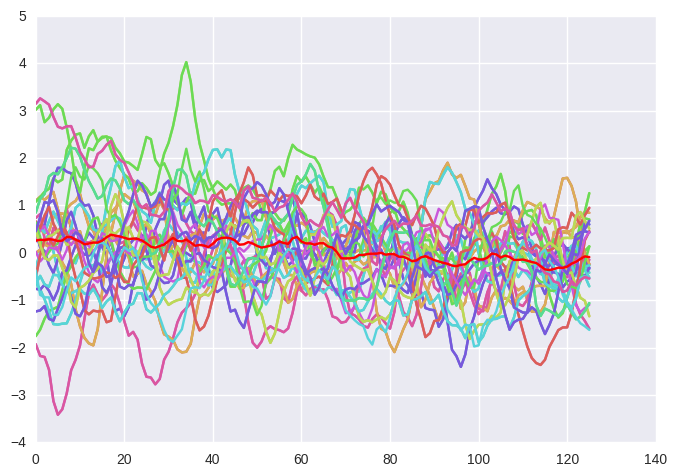

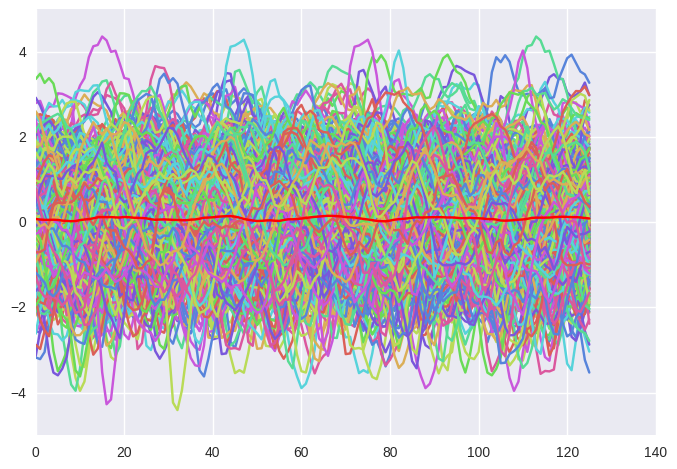

In [555]:
chan = 33
print X_RF_cropped[filt,:,chan].shape
plt.plot(X_RF_cropped[filt,:,chan].T)
plt.plot(X_RF_cropped[filt,:,chan].T.mean(axis=1),'red')
plt.show()

plt.plot(Input_baseline[:,chan].T)
plt.plot(Input_baseline[:,chan].T.mean(axis=1),'red')
plt.show()

### Mean amplitude of specific channel
Top: Optimal inputs

Bottom: Arbitrary inputs

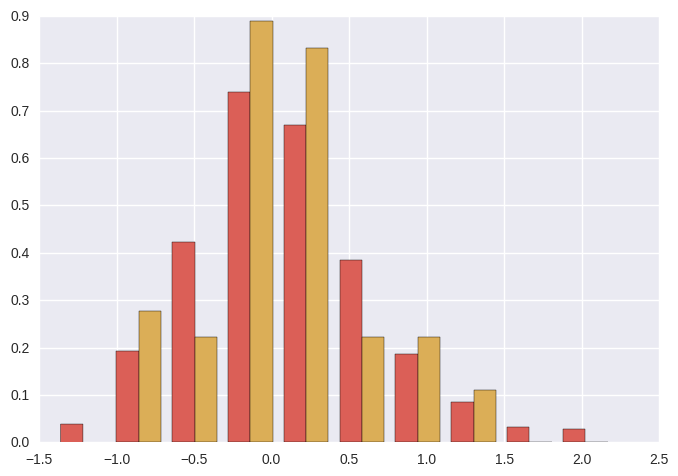

In [556]:
chan=33
h = plt.hist([mean_base[:,chan],mean[:,chan]],normed=True)
plt.show()

### Frequency spectrum of specific channel
Top: Optimal inputs

Bottom: Arbitrary inputs

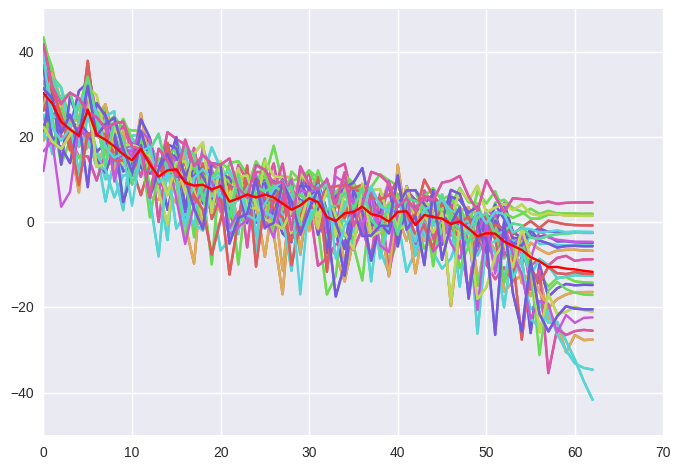

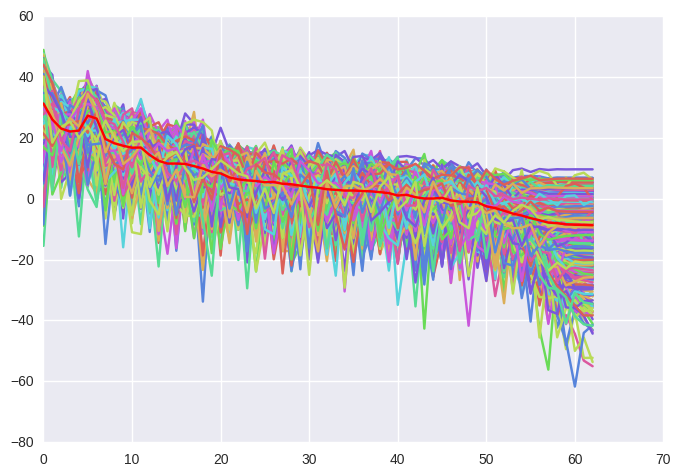

In [557]:
chan = 33
X = range(FFT.shape[2])
plt.plot(X,FFT[:,chan].T)
plt.plot(X,FFT[:,chan].mean(axis=0).T,'red')
plt.show()
plt.plot(FFT_base[:,chan].T)
plt.plot(FFT_base[:,chan].mean(axis=0).T,'red')
plt.show()

### Change of mean amplitude of specific channel
Top: Optimal inputs

Bottom: Arbitrary inputs

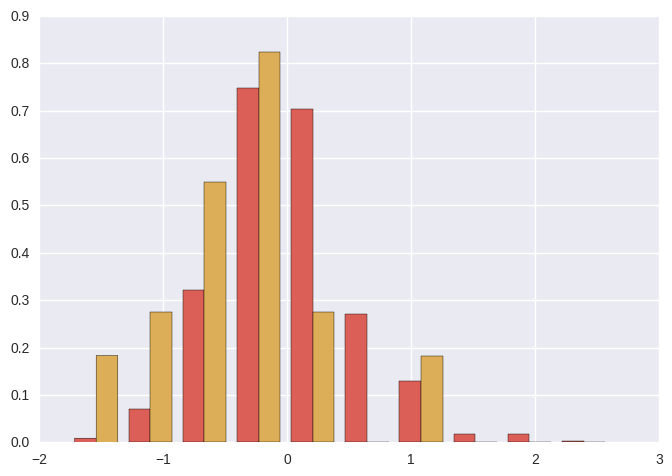

In [558]:
chan=33
h = plt.hist([meanc_base[:,chan],meanc[:,chan]],normed=True)
plt.show()

### Change of frequency spectrum of specific channel
Top: Optimal inputs

Bottom: Arbitrary inputs

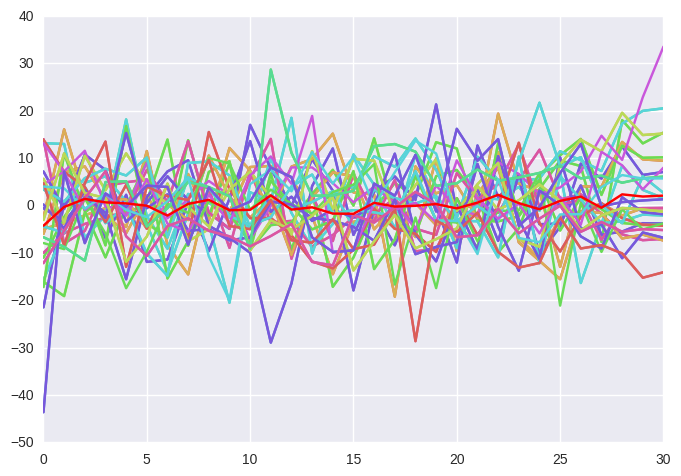

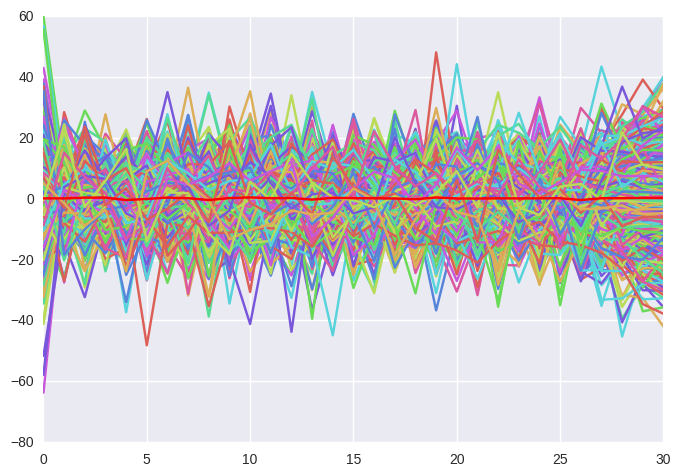

In [559]:
chan = 33
plt.plot(FFTc[:,chan].T)
plt.plot(FFTc[:,chan].mean(axis=0).T,'red')
plt.show()
plt.plot(FFTc_base[:,chan].T)
plt.plot(FFTc_base[:,chan].mean(axis=0).T,'red')
plt.show()